# Исследование рынка общественного питания в Москве

**Цель проекта:** выбор подходящего формата и места для открытия заведения общественного питания в Москве.

**Задачи проекта:** исследовать рынок, найти интересные особенности и презентовать полученные результаты.

**Данные:** датасет с заведениями общественного питания Москвы, составленный летом 2022 года.

# Шаг 1. Загрузим данные и изучим общую информацию


In [58]:
#загрузим нужные библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math as mth
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objects as go

In [59]:
#загрузим данные в переменную 'data'
try:
   data = pd.read_csv('/datasets/moscow_places.csv', sep=',')
except:
   data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv', sep=',')
   
   data_copy = data.copy(deep=True)

In [60]:
#общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [61]:
#первые строки
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


### Описание данных

Данные о 8406 заведениях. Три типа данных: object, float64 и int. Есть пропущенные значения.

В таблице четырнадцать столбцов:

name — название заведения;\
address — адрес заведения;\
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;\
hours — информация о днях и часах работы;\
lat — широта географической точки, в которой находится заведение;\
lng — долгота географической точки, в которой находится заведение;\
rating — рейтинг заведения по оценкам пользователей (высшая оценка — 5.0);\
price — категория цен в заведении: «средние», «ниже среднего», «выше среднего» и т.д;\
avg_bill — средняя стоимость заказа;\
middle_avg_bill — средний чек;\
middle_coffee_cup — цена одной чашки капучино;\
chain — показатель, является ли заведение сетевым ;\
district — административный район, в котором находится заведение;\
seats — количество посадочных мест.

# Шаг 2. Выполним предобработку данных

Пропусков в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup много, более 50% значений отсутствуют. В столбце seats, чуть меньше половины.\
Заполнение пропусков медианными значениями делать не будем, можем исказить общую картину.

In [62]:
#Проверим на явные дубликаты
data.duplicated().sum()

0

Создадим столбец street с названиями улиц из столбца с адресом:

In [63]:
#функцией split разобьем строки на подсроки по разделителю ','
data['street']=[x.split(',')[1] for x in data['address'].values]

Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):\
логическое значение True — если заведение работает ежедневно и круглосуточно;\
логическое значение False — в противоположном случае

In [64]:
#contains() присвоит Ttue при наличии слов 'ежедневно, круглосуточно'
data['is_24_7'] = data['hours'].str.contains('ежедневно, круглосуточно')

In [65]:
#первые строки
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,Правобережная улица,False


Данные прошли предобработку и соответствуют необходимому уровню качества, для дальнейшего интеллектуального анализа и проверке гипотез.

# Шаг 3. Анализ данных

Количество объектов общественного питания по категориям:

In [66]:
data_ctg = data.groupby('category').agg({'name': 'count'}).sort_values(by='name', ascending=False).reset_index()
data_ctg.columns = ['category', 'count']
data_ctg

,category,count
0,кафе,2378
1,ресторан,2043
2,кофейня,1413
3,"бар,паб",765
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


Построим столбчатую диаграмму для визуализации:

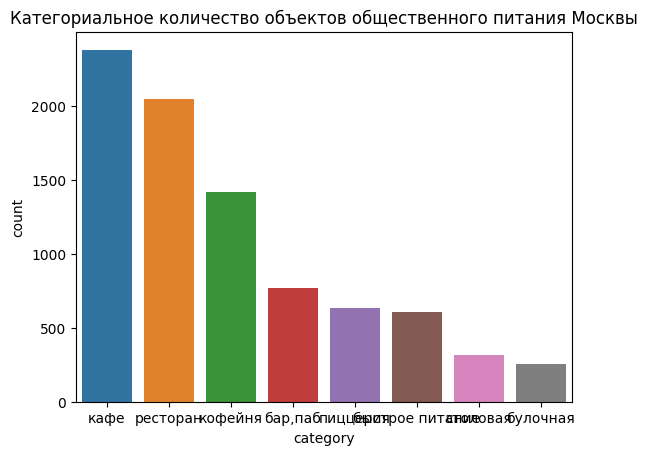

In [67]:
ax = sns.barplot(x='category', y='count', data=data_ctg).set(title='Категориальное количество объектов общественного питания Москвы')

Самая многочисленая категория - 2378  кафе, много ресторанов и кофеен - 2043 и 1413 соответственно.

Медианное количество посадочных мест по категориям:

In [68]:
data_seats = data.groupby('category').agg({'seats': 'median'}).sort_values(by='seats', ascending=False).reset_index().round()
data_seats

,category,seats
0,ресторан,86.0
1,"бар,паб",82.0
2,кофейня,80.0
3,столовая,76.0
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


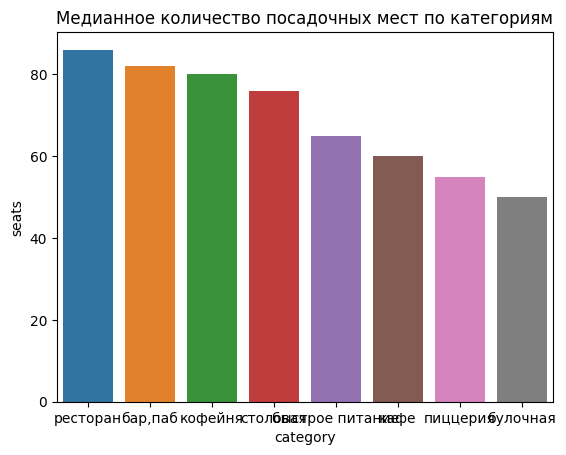

In [69]:
ax = sns.barplot(x='category', y='seats', data=data_seats).set(title='Медианное количество посадочных мест по категориям')

В кофейнях, барах/пабах и ресторанах по 80-86 посадочных мест, в столовых и заведениях быстрого питания 76 и 65, кафе - 60, а в пиццериях и булочных 55 и 50 мест соответственно.

In [70]:
dch = data.groupby('chain').agg({'name': 'count'}).sort_values(by='name', ascending=False).reset_index()
dch['chain'] = dch['chain'].replace(0, 'несетевой')
dch['chain'] = dch['chain'].replace(1, 'сетевой')
dch

,chain,name
0,несетевой,5201
1,сетевой,3205


In [71]:
#построим круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=dch['chain'], values=dch['name'])])
fig.update_layout(title='Соотношение сетевых и несетевых заведений', # указываем заголовок графика
                 width=800, # указываем размеры графика
                 height=600,
                 annotations=[dict(x=1.12, #аннотация легенды
                                   y=1.05,
                                   text='Формат',
                                   showarrow=False)])

fig.show()

Несетевые заведения пребладают в соотношении 62% к 32% сетевым

### Категории заведений чаще являющиеся сетевыми 
Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [72]:
#сгруппируем по категориям и принадлежности к сети
data_chain = data.groupby(['chain', 'category'])[['name']].count().sort_values('name', ascending=False).reset_index()
#заменим значения 0 и 1 на 'несетевой' и 'сетевой'
data_chain['chain'] = data_chain['chain'].replace(0, 'несетевой')
data_chain['chain'] = data_chain['chain'].replace(1, 'сетевой')

In [73]:
# строим гистограммы
fig = px.histogram(data_chain, # загружаем данные
                   x='category', # указываем столбец с данными для оси X
                   y='name',
                   color='chain', # обозначаем категорию для разделения цветом
                   range_x=[-1, 8], # ограничиваем ось X
                   title='Частота заведений по категориям с учетом принадлежности к сети ', # указываем заголовок
                   nbins=7, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Категории') # подпись для оси X
fig.update_yaxes(title_text='Частота') # подпись для оси Y
fig.show() # выводим график

In [74]:
#подготовим данные по несетевым заведениям
data_chain_0 = data.query('chain == 0').groupby(['chain', 'category'])[['name']].count().sort_values('name', ascending=False).reset_index()
data_chain_0.drop (columns=data_chain_0.columns [0], axis= 1 , inplace= True )
data_chain_0.columns=['category', 'non_chain']
#подготовим данные по сетевым заведениям
data_chain_1 = data.query('chain == 1').groupby(['chain', 'category'])[['name']].count().sort_values('name', ascending=False).reset_index()
data_chain_1.drop (columns=data_chain_1.columns [0], axis= 1 , inplace= True )
data_chain_1.columns=['category', 'yes_chain']
#объединим данные по сетевым заведениям
df_chain = data_chain_1.merge(data_chain_0, on='category', how='left' )
#добавим столбец % сетевых заведений к общему числу
df_chain['%_chain'] = (df_chain['yes_chain']/(df_chain['yes_chain']+df_chain['non_chain'])*100).round(2)
#отсортируем по убыванию % к несетевым
df_chain = df_chain.sort_values('%_chain', ascending=False).reset_index(drop= True)
df_chain

,category,yes_chain,non_chain,%_chain
0,булочная,157,99,61.33
1,пиццерия,330,303,52.13
2,кофейня,720,693,50.96
3,быстрое питание,232,371,38.47
4,ресторан,730,1313,35.73
5,кафе,779,1599,32.76
6,столовая,88,227,27.94
7,"бар,паб",169,596,22.09


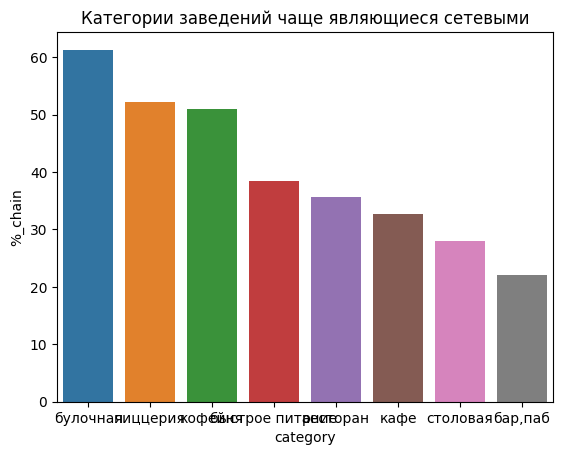

In [75]:
ax = sns.barplot(x='category', y='%_chain', data=df_chain).set(title='Категории заведений чаще являющиеся сетевыми')

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [76]:
#топ популярных сетей в Москве
top_chain = data.query('chain == 1')\
                .groupby(['name', 'category'], as_index = False)[['chain']]\
                .count().sort_values(by='chain', ascending=False)\
                .reset_index(drop=True).head(15)
top_chain = top_chain.rename(columns={'chain' : 'amount'})
top_chain

,name,category,amount
0,Шоколадница,кофейня,119
1,Домино'с Пицца,пиццерия,76
2,Додо Пицца,пиццерия,74
3,One Price Coffee,кофейня,71
4,Яндекс Лавка,ресторан,69
5,Cofix,кофейня,65
6,Prime,ресторан,49
7,КОФЕПОРТ,кофейня,42
8,Кулинарная лавка братьев Караваевых,кафе,39
9,Теремок,ресторан,36


In [77]:
#заменим длинное название
top_chain = top_chain.replace(['Кулинарная лавка братьев Караваевых'], 'лавка Караваевых')

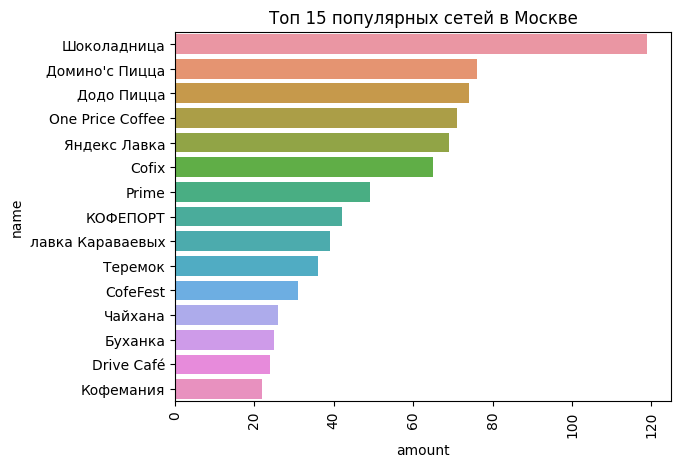

In [78]:
#визуализируем топ 15 популярных сетей
ax = sns.barplot(x='amount', y='name', data=top_chain).set(title='Топ 15 популярных сетей в Москве')
plt.xticks(rotation=90);

In [79]:
#с помощью plotly добавим категории в Топ 15 популярных сетей в Москве
fig = px.bar(top_chain, x='name', y='amount', color='category', title='Топ 15 популярных сетей в Москве с учетом категории')
fig.update_xaxes(tickangle=45)
fig.show()

Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [93]:
#общее количество заведений по районам
data_d = data.groupby(['district'])['name'].count().reset_index().sort_values(by='name', ascending=False).reset_index(drop=True)
data_d

,district,name
0,Центральный административный округ,2242
1,Северный административный округ,900
2,Южный административный округ,892
3,Северо-Восточный административный округ,891
4,Западный административный округ,851
5,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
8,Северо-Западный административный округ,409


In [94]:
#количество заведений по районам и категориям
data_di = data.pivot_table(
       index='district', columns='category', values='name', aggfunc='count'
   ).reset_index()
#объединим данные
data_ds = data_d.merge(data_di, on='district', how='left' )
data_ds = data_ds.rename(columns={'district':'округ', 'name': 'всего'})
data_ds

,округ,всего,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
0,Центральный административный округ,2242,364,50,87,464,428,113,670,66
1,Северный административный округ,900,68,39,58,235,193,77,189,41
2,Южный административный округ,892,68,25,85,264,131,73,202,44
3,Северо-Восточный административный округ,891,63,28,82,269,159,68,182,40
4,Западный административный округ,851,50,37,62,239,150,71,218,24
5,Восточный административный округ,798,53,25,71,272,105,72,160,40
6,Юго-Восточный административный округ,714,38,13,67,282,89,55,145,25
7,Юго-Западный административный округ,709,38,27,61,238,96,64,168,17
8,Северо-Западный административный округ,409,23,12,30,115,62,40,109,18


In [83]:
data.head(2)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False


In [84]:
#data_di.columns = ['district', 'бар,паб', 'булочная',  'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']

In [85]:
data.groupby(['district', 'category'])['name'].count().reset_index().sort_values(by='name', ascending=False).reset_index(drop=True)

,district,category,name
0,Центральный административный округ,ресторан,670
1,Центральный административный округ,кафе,464
2,Центральный административный округ,кофейня,428
3,Центральный административный округ,"бар,паб",364
4,Юго-Восточный административный округ,кафе,282
...,...,...,...
67,Северо-Западный административный округ,"бар,паб",23
68,Северо-Западный административный округ,столовая,18
69,Юго-Западный административный округ,столовая,17
70,Юго-Восточный административный округ,булочная,13


Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы)('https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson')

Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?


Необязательное задание: проиллюстрируйте другие взаимосвязи, которые вы нашли в данных. Например, по желанию исследуйте часы работы заведений и их зависимость от расположения и категории заведения. Также можно исследовать особенности заведений с плохими рейтингами, средние чеки в таких местах и распределение по категориям заведений.

# Шаг 4. Детализируем исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья».\
Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве.\
Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно.\
Попробуйте определить, осуществима ли мечта клиентов.\

Ответьте на следующие вопросы:\
Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?\
Есть ли круглосуточные кофейни?\
Какие у кофеен рейтинги? Как они распределяются по районам?\
На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?\
По желанию вы можете расширить список вопросов для исследования, добавив собственные.\
Постройте визуализации. Попробуйте дать рекомендацию для открытия нового заведения.\
Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано.\
Объяснить свою рекомендацию можно текстом с описанием или маркерами на географической карте.


# Шаг 5. Подготовка презентации

Подготовьте презентацию исследования для инвесторов.\
Отвечая на вопросы о московском общепите, вы уже построили много диаграмм, и помещать каждую из них в презентацию не нужно.\ 
Выберите важные тезисы и наблюдения, которые могут заинтересовать заказчиков.\
Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате PDF.\
Приложите ссылку на презентацию в markdown-ячейке в формате:\
Скопировать код\
Презентация: <ссылка на облачное хранилище с презентацией>\
Следуйте принципам оформления из темы «Подготовка презентации».

In [86]:
print(plt.style.available) # вызовем разные наборы цветов 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


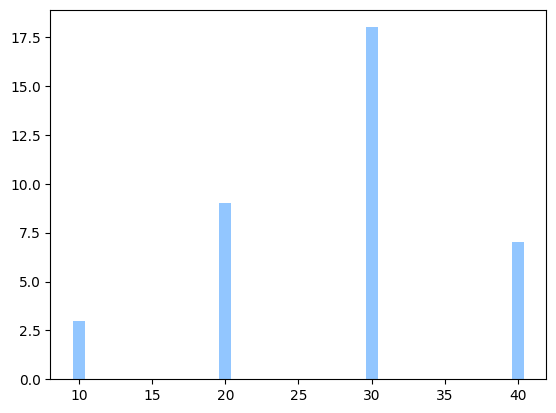

In [87]:
with plt.style.context('seaborn-pastel'):
    plt.bar([10, 20, 30, 40],[3, 9, 18, 7]) 